## OA Flux plots

Make annual mean plots to of OA Flux data product (Yu and Weller, 2008?).  Prioritize maps of time mean latent, sensible, SWR, LWR, and truncate to satellite era. 

@author: jtomfarar
jfarrar@whoi.edu

In [1]:
import xarray as xr
import numpy as np
import glob
import matplotlib.pyplot as plt
import matplotlib
import datetime


import cartopy.crs as ccrs                   # import projections
import cartopy


In [2]:
# %matplotlib qt 
plt.rcParams['figure.figsize'] = (5,4)
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 400
plt.close('all')

__figdir__ = '../plots/' + 'OAFlux_'
savefig_args = {'bbox_inches':'tight', 'pad_inches':0.2}
plotfiletype='pdf'

'''
try:
    mkdir(__figdir__)
except FileExistsError:
    print('Plot directory exists.')
'''

"\ntry:\n    mkdir(__figdir__)\nexcept FileExistsError:\n    print('Plot directory exists.')\n"

In [3]:
savefig = True
zoom = False
if zoom:
    xmin, xmax = (125,290)
    ymin, ymax = (-28,65)
else:
    xmin, xmax = (-180,180)
    ymin, ymax = (-90,90)
    

In [4]:
def make_figure(lon,lat,field,levels,plt_title,cbar_title,outfile):
    """ Make a map and save the figure.
         Inputs
            - lon,lat,field,levels,plt_title,cbar_title,outfile

         return
            - exit code (True if OK)

    """
    
    fig = plt.figure()
    ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=200))  # Orthographic
    extent = [xmin, xmax, ymin, ymax]
    ax.set_extent(extent, crs=ccrs.PlateCarree())
    ax.set_title(plt_title,size = 10.)

    plt.set_cmap(cmap=plt.get_cmap('turbo'))
    gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.ylabels_right = False

    ax.coastlines()
    ax.add_feature(cartopy.feature.LAND, zorder=0, facecolor=[.6,.6,.6], edgecolor='black')
    cs = ax.contourf(lon,lat,field, levels,  extend='both', transform=ccrs.PlateCarree())
    # cb = plt.colorbar(cs,ax=ax,shrink=.8,pad=.05)
    cb = plt.colorbar(cs,fraction = 0.022)
    cb.set_label(cbar_title,fontsize = 10)


    if savefig:
        plt.savefig(__figdir__+outfile,**savefig_args)

    
    return True


# Net surface heat flux

In [5]:
#Define path using the r prefix (which means raw string so that special character \ should not be evaluated)
path_dir: str = r"..\data\raw\OAFlux_monthly\netheat_1983-2009"

# Get a list of all .nc files available in different folders
filenames = glob.glob(path_dir+r"\*.nc")

dsmerged = xr.open_mfdataset(filenames,combine='nested',concat_dim='time')

In [6]:
#Inputs to plot function
plt_title='Net surface heat flux to ocean'
cbar_title='Net surface [W/m$^2$]'
outfile='net_surface_flux.'+plotfiletype
lon=dsmerged.lon
lat=dsmerged.lat
field=np.mean(dsmerged.qnet,0)
levels = np.linspace(-200,200,21)

C:\Users\jtomf\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
C:\Users\jtomf\anaconda3\lib\site-packages\dask\array\numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


True

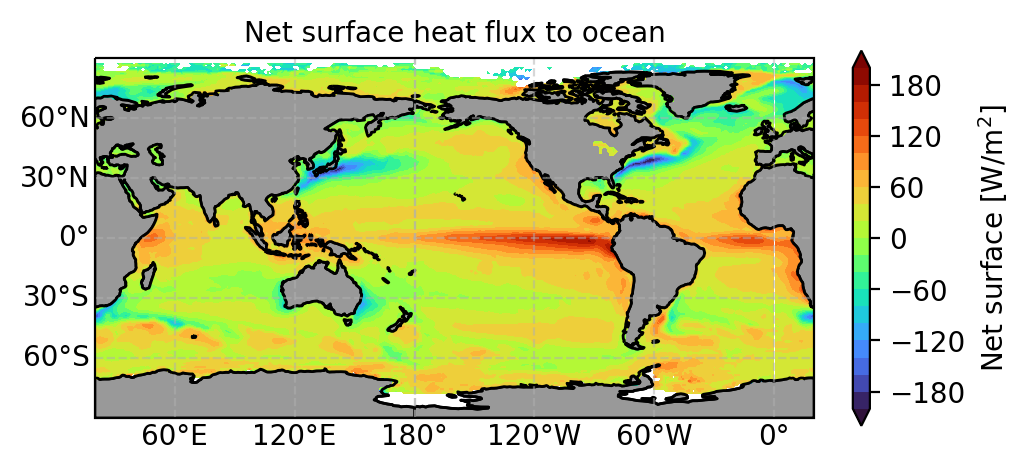

In [7]:
make_figure(lon,lat,field,levels,plt_title,cbar_title,outfile)

# Radiative flux: SWR

In [8]:
#Define path using the r prefix (which means raw string so that special character \ should not be evaluated)
path_dir: str = r"..\data\raw\OAFlux_monthly\radiation_1983-2009"

# Get a list of all .nc files available in different folders
filenames = glob.glob(path_dir+r"\sw*.nc")

dsmerged = xr.open_mfdataset(filenames,combine='nested',concat_dim='time')

In [9]:
dsmerged

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 240)
Coordinates:
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * time     (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    nswrs    (time, lat, lon) float32 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
Attributes:
    creation_date:  Dec 2007
    author:         ISCCP -FD dataset kindly provided by Dr. W.B. Rossow
    description:    linear interpolation and daily average were applied to ma...
    project_PIs:    Lisan Yu, Bob Weller
    website:        http://isccp.giss.nasa.gov/projects/flux.html

In [10]:
#Inputs to plot function
plt_title='Net solar radiation'
cbar_title='Solar radiation [W/m$^2$]'
outfile='net_surface_solar.'+plotfiletype
lon=dsmerged.lon
lat=dsmerged.lat
field=np.mean(dsmerged.nswrs,0)
levels = np.linspace(0,300,31)

C:\Users\jtomf\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
C:\Users\jtomf\anaconda3\lib\site-packages\dask\array\numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


True

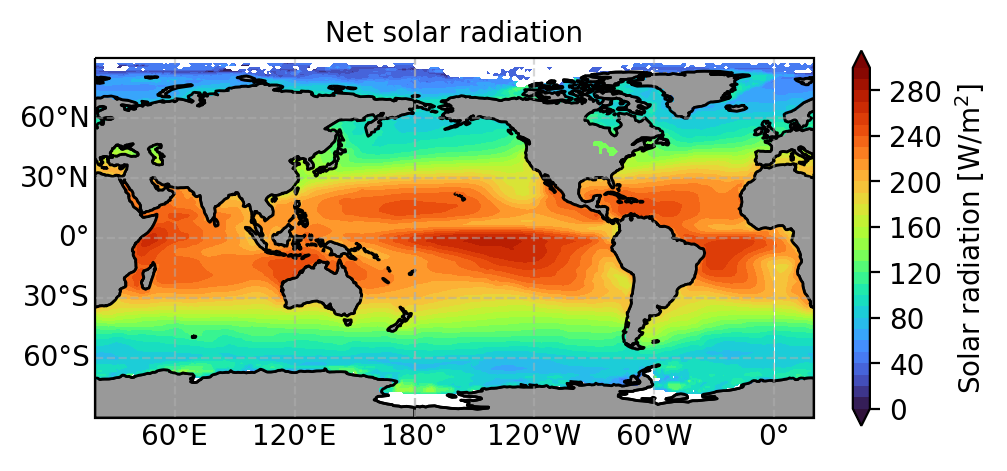

In [11]:
make_figure(lon,lat,field,levels,plt_title,cbar_title,outfile)

# Radiative flux: SWR

In [12]:
#Define path using the r prefix (which means raw string so that special character \ should not be evaluated)
path_dir: str = r"..\data\raw\OAFlux_monthly\radiation_1983-2009"

# Get a list of all .nc files available in different folders
filenames = glob.glob(path_dir+r"\sw*.nc")

dsmerged = xr.open_mfdataset(filenames,combine='nested',concat_dim='time')

In [13]:
dsmerged

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 240)
Coordinates:
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * time     (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    nswrs    (time, lat, lon) float32 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
Attributes:
    creation_date:  Dec 2007
    author:         ISCCP -FD dataset kindly provided by Dr. W.B. Rossow
    description:    linear interpolation and daily average were applied to ma...
    project_PIs:    Lisan Yu, Bob Weller
    website:        http://isccp.giss.nasa.gov/projects/flux.html

In [14]:
#Inputs to plot function
plt_title='Net solar radiation'
cbar_title='Solar radiation [W/m$^2$]'
outfile='net_surface_solar.'+plotfiletype
lon=dsmerged.lon
lat=dsmerged.lat
field=np.mean(dsmerged.nswrs,0)
levels = np.linspace(0,300,31)

C:\Users\jtomf\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
C:\Users\jtomf\anaconda3\lib\site-packages\dask\array\numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


True

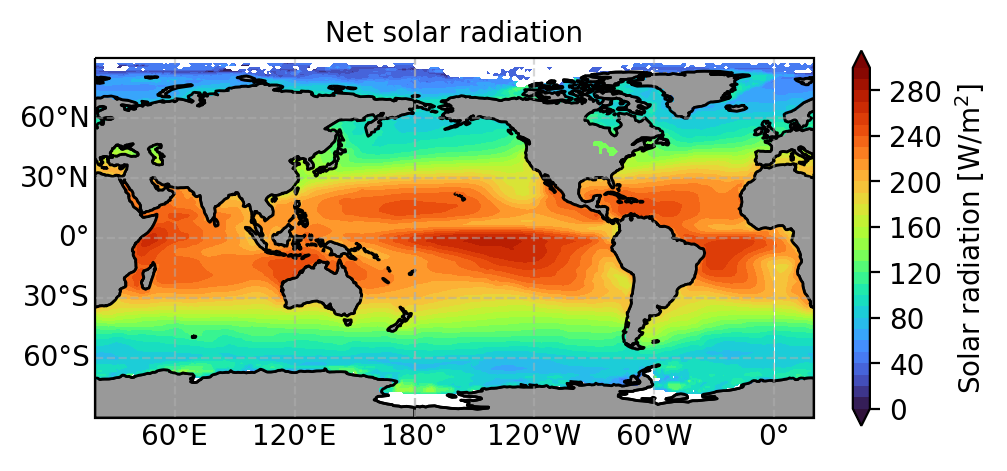

In [15]:
make_figure(lon,lat,field,levels,plt_title,cbar_title,outfile)

# Radiative flux: SWR

In [16]:
#Define path using the r prefix (which means raw string so that special character \ should not be evaluated)
path_dir: str = r"..\data\raw\OAFlux_monthly\radiation_1983-2009"

# Get a list of all .nc files available in different folders
filenames = glob.glob(path_dir+r"\lw*.nc")

dsmerged = xr.open_mfdataset(filenames,combine='nested',concat_dim='time')

In [17]:
dsmerged

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 240)
Coordinates:
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * time     (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    nlwrs    (time, lat, lon) float32 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
Attributes:
    creation_date:  Dec 2007
    author:         ISCCP -FD dataset kindly provided by Dr. W.B. Rossow
    description:    linear interpolation and daily average were applied to ma...
    project_PIs:    Lisan Yu, Bob Weller
    website:        http://isccp.giss.nasa.gov/projects/flux.html

In [18]:
#Inputs to plot function
plt_title='Net longwave (infrared) radiation'
cbar_title='Longwave radiation [W/m$^2$]'
outfile='net_surface_lwr.'+plotfiletype
lon=dsmerged.lon
lat=dsmerged.lat
field=np.mean(dsmerged.nlwrs,0)
levels = np.linspace(-25,100,26)

C:\Users\jtomf\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
C:\Users\jtomf\anaconda3\lib\site-packages\dask\array\numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


True

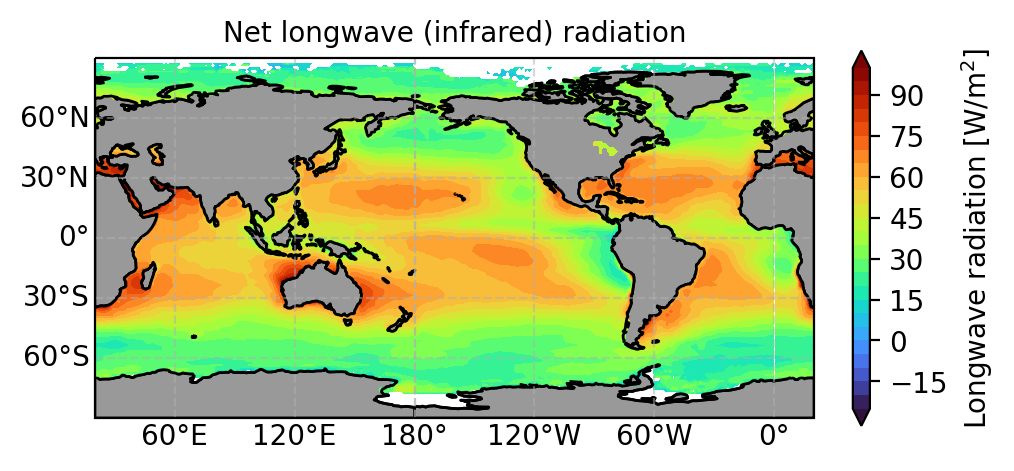

In [19]:
make_figure(lon,lat,field,levels,plt_title,cbar_title,outfile)

# Latent HF

In [20]:
#Define path using the r prefix (which means raw string so that special character \ should not be evaluated)
path_dir: str = r"..\data\raw\OAFlux_monthly\turbulence"

# Get a list of all .nc files available in different folders
filenames = glob.glob(path_dir+r"\lh*.nc")

dsmerged = xr.open_mfdataset(filenames[0:20],combine='nested',concat_dim='time')

In [21]:
filenames[0:20]

['..\\data\\raw\\OAFlux_monthly\\turbulence\\lh_oaflux_1990.nc',
 '..\\data\\raw\\OAFlux_monthly\\turbulence\\lh_oaflux_1991.nc',
 '..\\data\\raw\\OAFlux_monthly\\turbulence\\lh_oaflux_1992.nc',
 '..\\data\\raw\\OAFlux_monthly\\turbulence\\lh_oaflux_1993.nc',
 '..\\data\\raw\\OAFlux_monthly\\turbulence\\lh_oaflux_1994.nc',
 '..\\data\\raw\\OAFlux_monthly\\turbulence\\lh_oaflux_1995.nc',
 '..\\data\\raw\\OAFlux_monthly\\turbulence\\lh_oaflux_1996.nc',
 '..\\data\\raw\\OAFlux_monthly\\turbulence\\lh_oaflux_1997.nc',
 '..\\data\\raw\\OAFlux_monthly\\turbulence\\lh_oaflux_1998.nc',
 '..\\data\\raw\\OAFlux_monthly\\turbulence\\lh_oaflux_1999.nc',
 '..\\data\\raw\\OAFlux_monthly\\turbulence\\lh_oaflux_2000.nc',
 '..\\data\\raw\\OAFlux_monthly\\turbulence\\lh_oaflux_2001.nc',
 '..\\data\\raw\\OAFlux_monthly\\turbulence\\lh_oaflux_2002.nc',
 '..\\data\\raw\\OAFlux_monthly\\turbulence\\lh_oaflux_2003.nc',
 '..\\data\\raw\\OAFlux_monthly\\turbulence\\lh_oaflux_2004.nc',
 '..\\data\\raw\\OAFlux_m

In [22]:
dsmerged

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 240)
Coordinates:
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * time     (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    lhtfl    (time, lat, lon) float32 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    err      (time, lat, lon) float32 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
Attributes:
    creation_date:  Dec 2007
    description:    WHOI Objectively Analyzed air-sea Fluxes (OAFlux) Project
    project_PIs:    Lisan Yu, Bob Weller
    website:        http://oaflux.whoi.edu

In [23]:
#Inputs to plot function
plt_title='Latent heat flux (out of ocean)'
cbar_title='Latent heat flux [W/m$^2$]'
outfile='latent.'+plotfiletype
lon=dsmerged.lon
lat=dsmerged.lat
field=np.mean(dsmerged.lhtfl,0)
levels = np.linspace(0,300,31)

C:\Users\jtomf\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
C:\Users\jtomf\anaconda3\lib\site-packages\dask\array\numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


True

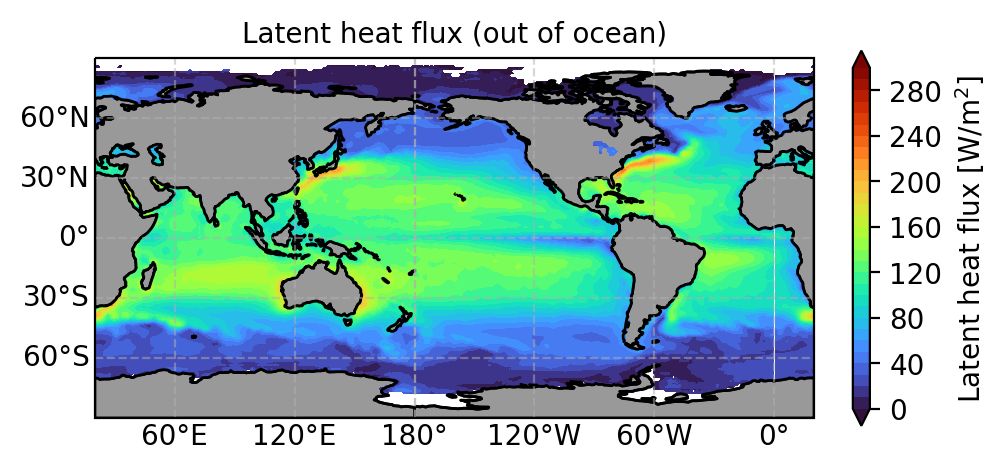

In [24]:
make_figure(lon,lat,field,levels,plt_title,cbar_title,outfile)

# Sensible HF

In [25]:
#Define path using the r prefix (which means raw string so that special character \ should not be evaluated)
path_dir: str = r"..\data\raw\OAFlux_monthly\turbulence"

# Get a list of all .nc files available in different folders
filenames = glob.glob(path_dir+r"\sh*.nc")

dsmerged = xr.open_mfdataset(filenames[0:20],combine='nested',concat_dim='time')

In [26]:
dsmerged

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 240)
Coordinates:
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * time     (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    shtfl    (time, lat, lon) float32 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    err      (time, lat, lon) float32 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
Attributes:
    creation_date:  Dec 2007
    description:    WHOI Objectively Analyzed air-sea Fluxes (OAFlux) Project
    project_PIs:    Lisan Yu, Bob Weller
    website:        http://oaflux.whoi.edu

In [27]:
#Inputs to plot function
plt_title='Sensible heat flux (out of ocean)'
cbar_title='Sensible heat flux [W/m$^2$]'
outfile='sensible.'+plotfiletype
lon=dsmerged.lon
lat=dsmerged.lat
field=np.mean(dsmerged.shtfl,0)
levels = np.linspace(0,100,11)

C:\Users\jtomf\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
C:\Users\jtomf\anaconda3\lib\site-packages\dask\array\numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


True

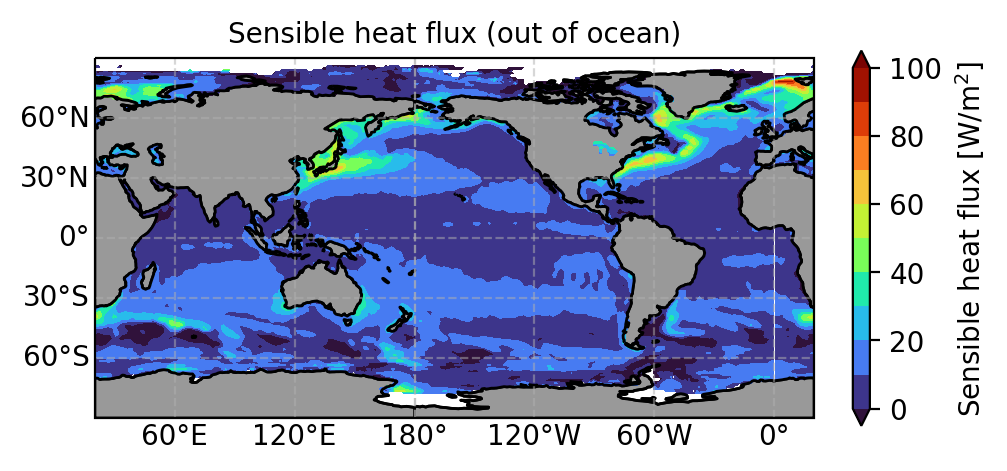

In [28]:
make_figure(lon,lat,field,levels,plt_title,cbar_title,outfile)